In [50]:
import pandas
egitim_verisi=pandas.read_csv("train.csv")
test_verisi=pandas.read_csv("test_x.csv")

In [51]:
egitim_verisi["Cinsiyet"] =egitim_verisi["Cinsiyet"].replace(["Erkek"],1)
egitim_verisi["Cinsiyet"] =egitim_verisi["Cinsiyet"].replace(["Kadın"],0)


In [29]:
egitim_verisi


index  Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0         0         0     31-40        Bekar  Yüksek Lisans Mezunu   
1         1         1       >60         Evli           Lise Mezunu   
2         2         1     18-30        Bekar           Lise Mezunu   
3         3         1     51-60         Evli           Lise Mezunu   
4         4         1     31-40         Evli       Ortaokul Mezunu   
...     ...       ...       ...          ...                   ...   
5455   5455         0       >60        Bekar     Üniversite Mezunu   
5456   5456         1     51-60         Evli         Doktora Ötesi   
5457   5457         0     51-60         Evli        İlkokul Mezunu   
5458   5458         0     18-30        Bekar     Yüksekokul Mezunu   
5459   5459         1     18-30        Bekar     Yüksekokul Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0     Düzenli ve Ücretli Bir İşi Var          748266.440879      Büyük Şehir   
1                Kendi İşinin Sahibi          246298.609605      Küçük Şehir   
2     Düzenli ve Ücretli Bir İşi Var          268582.732360      Küçük Şehir   
3                Kendi İşinin Sahibi          327721.837865           Kırsal   
4     İşsiz veya Düzenli Bir İşi Yok          397431.626948      Büyük Şehir   
...                              ...                    ...              ...   
5455                          Emekli          478054.247819  Köy veya Kasaba   
5456             Kendi İşinin Sahibi          481852.853651  Köy veya Kasaba   
5457  Düzenli ve Ücretli Bir İşi Var          309443.687351      Küçük Şehir   
5458  Düzenli ve Ücretli Bir İşi Var          266604.268016      Büyük Şehir   
5459  Düzenli ve Ücretli Bir İşi Var          276155.078333      Büyük Şehir   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0     Elektronik ve Teknolojik Ürünler                        32010.900881   
1                     Spor Malzemeleri                         4145.729891   
2                                Giyim                         9924.379414   
3                                Giyim                         6417.780714   
4                                Giyim                         7886.663061   
...                                ...                                 ...   
5455                          Kozmetik                        43182.299801   
5456                     Ev ve Mobilya                        42107.996193   
5457                     Ev ve Mobilya                         4655.392445   
5458                     Ev ve Mobilya                         9016.165906   
5459                  Spor Malzemeleri                         9455.657480   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                      37.310644                   Etmiyor   
1                                      11.554851                   Etmiyor   
2                                      55.353236                    Ediyor   
3                                      15.417239                   Etmiyor   
4                                      14.689837                   Etmiyor   
...                                          ...                       ...   
5455                                   31.356284                   Etmiyor   
5456                                   26.288620                   Etmiyor   
5457                                    5.156906                   Etmiyor   
5458                                   39.205399                    Ediyor   
5459                                   50.554188                    Ediyor   

     Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0       obek_4                                102.936904  
1       obek_5                                 82.176053  
2       obek_8                                141.661426  
3       obek_3                                 17.097397  
4       obek_3                     

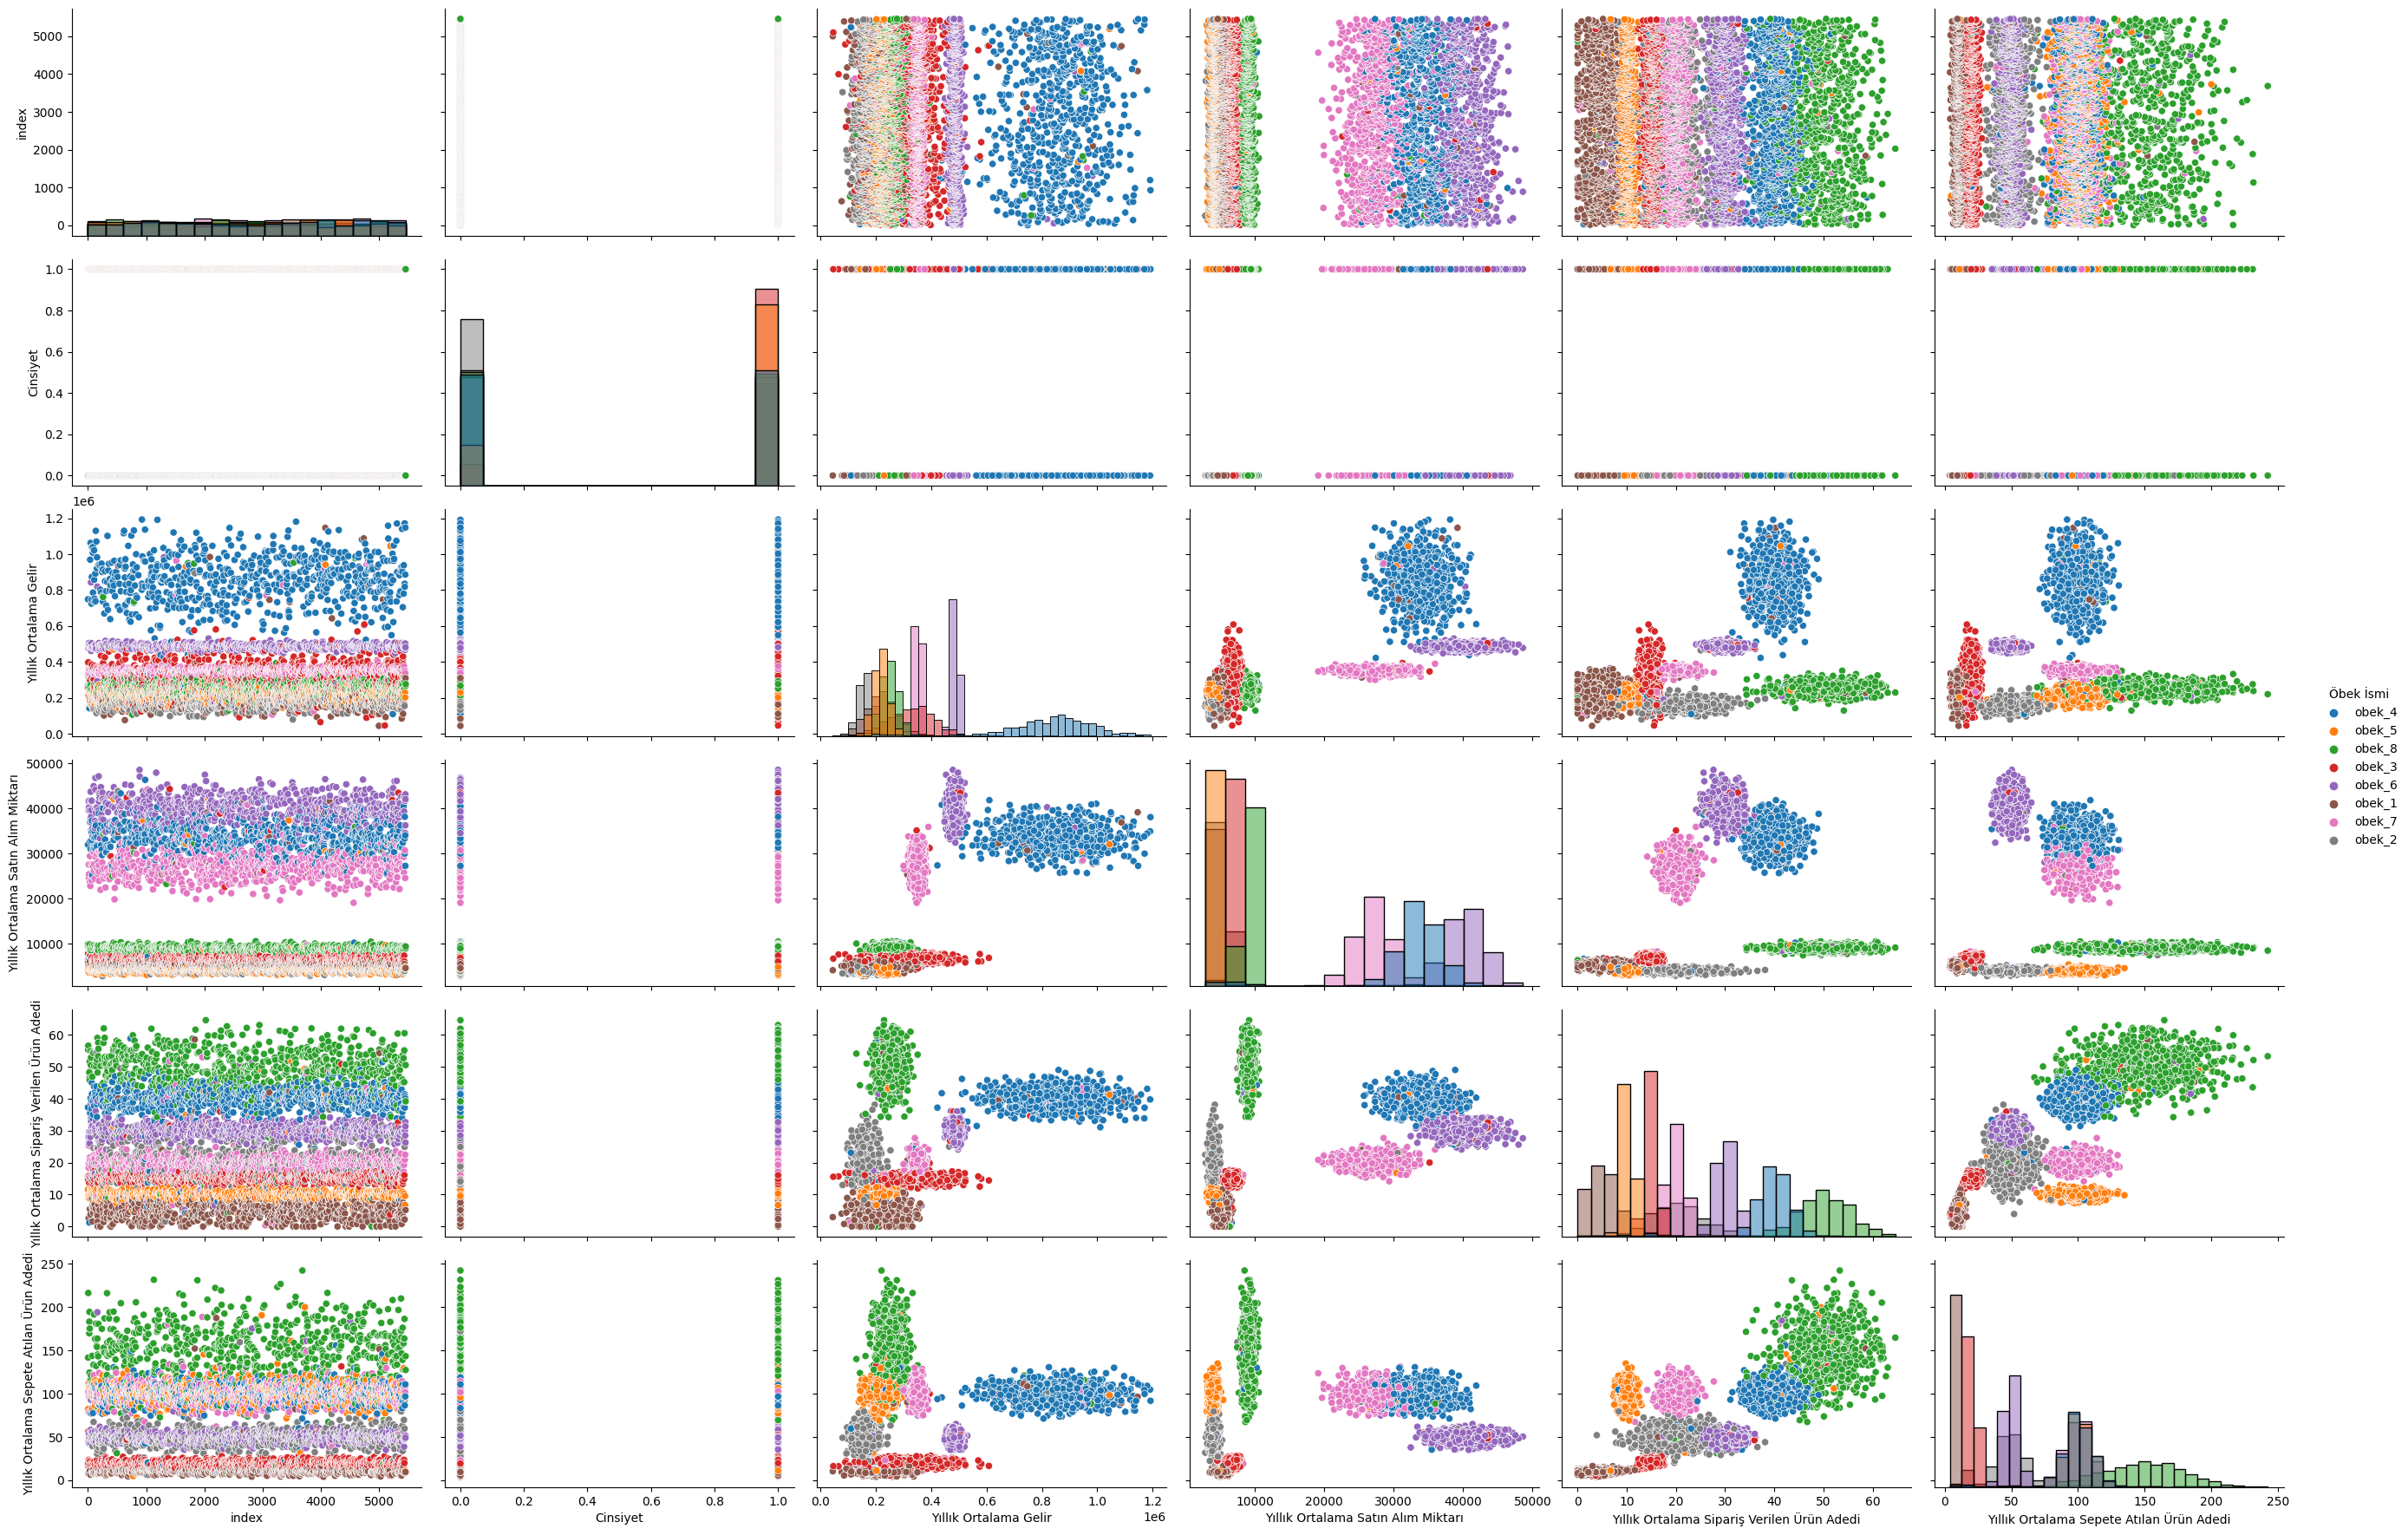

In [6]:
#Her bir veri grubu farklı renklerle temsil ediliyor, ana diyagonalde histogramlar görüntülenei.
#Veri kümesinin birbirleri ile ilişkisini ver verilerin nerelerde ifade aldığını görsel ile bakıldı 
#Öbeklerin ne anlam ifade ettiği görsellderden çıkarım yapıldı.
import seaborn as sns

sns.pairplot(egitim_verisi, hue="Öbek İsmi", diag_kind="hist", height=3, aspect=1.5)

#SVG dosyasına kaydetme daha kaliteli görebilmek için
#g.savefig("pairplot2.svg", format="svg")

In [21]:
#encode etme ve gereksiz encode edilen ekstra bir sütunu atma drop_first=True ile

egitim_verisi = pandas.get_dummies(egitim_verisi, columns=['Yaş Grubu','Medeni Durum','Eğitim Düzeyi',
                                                           'Yaşadığı Şehir', 'İstihdam Durumu','Eğitime Devam Etme Durumu', 
                                                           'En Çok İlgilendiği Ürün Grubu'],drop_first=True)
egitim_verisi = egitim_verisi.replace({True: 1, False: 0})

In [22]:
#encode etme ve gereksiz encode edilen ekstra bir sütunu atma drop_first=True ile
test_verisi["Cinsiyet"] =test_verisi["Cinsiyet"].replace(["Erkek"],1)
test_verisi["Cinsiyet"] =test_verisi["Cinsiyet"].replace(["Kadın"],0)
test_verisi = pandas.get_dummies(test_verisi, columns=['Yaş Grubu','Medeni Durum','Eğitim Düzeyi','Yaşadığı Şehir', 
                                                       'İstihdam Durumu','Eğitime Devam Etme Durumu', 
                                                       'En Çok İlgilendiği Ürün Grubu'],drop_first=True)
test_verisi = test_verisi.replace({True: 1, False: 0})


In [23]:
#column hakkında daha detaylı bilgi alma
# Sütun adı

sütun_adı = 'Yıllık Ortalama Sipariş Verilen Ürün Adedi'

# Frekansları hesaplama
frekanslar = egitim_verisi[sütun_adı].value_counts()

# Frekansları en çok tekrar edenden en aza doğru sıralama

sıralı_frekanslar = frekanslar.sort_values(ascending=False)

print(sıralı_frekanslar)

#print(frekanslar.describe())
#NaN_sayisi = egitim_verisi[egitim_verisi.columns[5]].value_counts()["NaN"]
#print(NaN_sayisi)
bos_veri_sayisi = egitim_verisi[sütun_adı].isna().sum()
print("bos veri sayısı: ",bos_veri_sayisi)


Yıllık Ortalama Sipariş Verilen Ürün Adedi
0.000000     39
18.389469     1
14.689837     1
56.626868     1
15.929857     1
             ..
5.156906      1
39.205399     1
2.187452      1
24.920568     1
50.554188     1
Name: count, Length: 5422, dtype: int64
bos veri sayısı:  0


In [8]:
import pandas as pd
#veriler hakkında daha detaylı sonuç alabilmek için farklı crosstablar denendi.
train = egitim_verisi
pd.crosstab(index=[train["Cinsiyet"], train["Yaşadığı Şehir"],train["Medeni Durum"]], columns=train["Öbek İsmi"])

Öbek İsmi                              obek_1  obek_2  obek_3  obek_4  obek_5  \
Cinsiyet Yaşadığı Şehir  Medeni Durum                                           
0        Büyük Şehir     Bekar             39      17       4     232      14   
                         Evli              34      91      24      64      14   
         Köy veya Kasaba Bekar             32      26       5       9      20   
                         Evli              56      88      13       5      14   
         Küçük Şehir     Bekar             53      51       0      15      41   
                         Evli              90     147      16       4      27   
         Kırsal          Bekar             27      20       1      19       0   
                         Evli              35      88       6       4       0   
1        Büyük Şehir     Bekar             32       3      41     247      58   
                         Evli              37       4     146      66      47   
         Köy veya Kasaba Bekar             40       3      24       8     105   
                         Evli              43       1     104       5      85   
         Küçük Şehir     Bekar             47       3      51      13     158   
                         Evli              68       2     204      11     122   
         Kırsal          Bekar             18       0       7      13       1   
                         Evli              41       3      49       5       0   

Öbek İsmi                              obek_6  obek_7  obek_8  
Cinsiyet Yaşadığı Şehir  Medeni Durum                          
0        Büyük Şehir     Bekar              9      67     152  
                         Evli              11     106      15  
         Köy veya Kasaba Bekar             56       4      21  
                         Evli             104      14       2  
         Küçük Şehir     Bekar             18      67     148  
                         Evli              30      87      21  
         Kırsal          Bekar             36       0       1  
                         Evli              80       2       0  
1        Büyük Şehir     Bekar              6      65     176  
                         Evli              12     105      21  
         Köy veya Kasaba Bekar             51       6      12  
                         Evli             119      11       6  
         Küçük Şehir     Bekar             20      55     126  
                         Evli              28     103      16  
         Kırsal          Bekar             32       1       0  
                         Evli              76       2       0

In [24]:
#0 değerlerini almadan denedim ve daha yüksek sonuç aldım daha sonra 0 değerleri genel ortalama yaptım
#fakat daha düşük aldım o yüzde o kodu koymuyorum.

egitim_verisi = egitim_verisi[egitim_verisi['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] != 0]


In [ ]:
#farklı 2 yada 3 durumu karşılayan değerler çıkartılarak denemeler yapıldı.

egitim_verisi
istenen_kisiler = (egitim_verisi['Eğitim Düzeyi'] == 'Doktora Ötesi') & (egitim_verisi['Eğitime Devam Etme Durumu'] == 'Ediyor')

# İstenen kişilerin indekslerini alın
istenen_kisiler_indeksler = istenen_kisiler.index

# Güncellenmiş veri çerçevesini görüntüleyin
egitim_verisi = egitim_verisi.drop(istenen_kisiler_indeksler)
egitim_verisi

In [11]:
# Filtreler ile spesifik bazı değerlerdeki fiadelere bakıldı

df = egitim_verisi

# Veri çerçevesindeki ilgili sütuna göre filtreleme

df = df[df['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] == 0]

#filtre = df['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] >= 44
#filtre = (df['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] >= 25) & (df['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] <= 26)
#filtre = (df['Öbek İsmi'] == 'obek_1')

df

index  Cinsiyet Yaş Grubu Medeni Durum      Eğitim Düzeyi  \
169     169         1     41-50         Evli    Ortaokul Mezunu   
208     208         1     18-30        Bekar        Lise Mezunu   
212     212         0     41-50         Evli  Yüksekokul Mezunu   
380     380         1     51-60         Evli    Ortaokul Mezunu   
397     397         0     51-60        Bekar     İlkokul Mezunu   
895     895         0     18-30         Evli     İlkokul Mezunu   
926     926         1     31-40         Evli        Lise Mezunu   
961     961         1       >60         Evli          Eğitimsiz   
1074   1074         1     31-40        Bekar     İlkokul Mezunu   
1240   1240         0     31-40         Evli      Doktora Ötesi   
1605   1605         0       >60        Bekar    Ortaokul Mezunu   
1635   1635         1     31-40         Evli     İlkokul Mezunu   
1679   1679         1     51-60         Evli  Üniversite Mezunu   
1978   1978         0     41-50        Bekar          Eğitimsiz   
2322   2322         0       >60        Bekar          Eğitimsiz   
2436   2436         1       >60         Evli     Doktora Mezunu   
2466   2466         0     41-50        Bekar     İlkokul Mezunu   
2637   2637         0     18-30         Evli    Ortaokul Mezunu   
2714   2714         1     31-40         Evli  Yüksekokul Mezunu   
3164   3164         0     31-40         Evli  Yüksekokul Mezunu   
3265   3265         1     51-60        Bekar          Eğitimsiz   
3336   3336         0     41-50         Evli          Eğitimsiz   
3528   3528         1     41-50         Evli          Eğitimsiz   
3578   3578         0       >60         Evli        Lise Mezunu   
3691   3691         1     41-50         Evli          Eğitimsiz   
3737   3737         1     41-50         Evli    Ortaokul Mezunu   
3798   3798         1     41-50         Evli     İlkokul Mezunu   
3881   3881         1     31-40        Bekar  Yüksekokul Mezunu   
4288   4288         1     51-60         Evli        Lise Mezunu   
4429   4429         1     18-30         Evli     İlkokul Mezunu   
4482   4482         1     41-50         Evli        Lise Mezunu   
4488   4488         1     18-30         Evli     İlkokul Mezunu   
4719   4719         1     51-60         Evli     Doktora Mezunu   
4876   4876         0     18-30         Evli          Eğitimsiz   
4945   4945         1     31-40         Evli    Ortaokul Mezunu   
4957   4957         0     18-30        Bekar    Ortaokul Mezunu   
5026   5026         0     41-50        Bekar        Lise Mezunu   
5211   5211         0     51-60         Evli  Yüksekokul Mezunu   
5284   5284         0     18-30         Evli        Lise Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
169   Düzenli ve Ücretli Bir İşi Var          251278.182344  Köy veya Kasaba   
208   İşsiz veya Düzenli Bir İşi Yok          231244.677536      Büyük Şehir   
212   Düzenli ve Ücretli Bir İşi Var          155449.231393      Küçük Şehir   
380   İşsiz veya Düzenli Bir İşi Yok          185936.844199      Küçük Şehir   
397   Düzenli ve Ücretli Bir İşi Var          291987.124944  Köy veya Kasaba   
895   Düzenli ve Ücretli Bir İşi Var          170219.240001           Kırsal   
926              Kendi İşinin Sahibi          304296.021695      Büyük Şehir   
961   Düzenli ve Ücretli Bir İşi Var          233889.193730      Küçük Şehir   
1074  Düzenli ve Ücretli Bir İşi Var          324307.460992  Köy veya Kasaba   
1240             Kendi İşinin Sahibi          159105.773277  Köy veya Kasaba   
1605             Kendi İşinin Sahibi          137874.533291      Küçük Şehir   
1635  İşsiz veya Düzenli Bir İşi Yok          218816.696723      Küçük Şehir   
1679  Düzenli ve Ücretli Bir İşi Var          134729.562685      Küçük Şehir   
1978             Kendi İşinin Sahibi          208245.981873           Kırsal   
2322             Kendi İşinin Sahibi          203117.703582           Kırsal   
2436  Düzenli ve Ücretli Bir İşi Var         

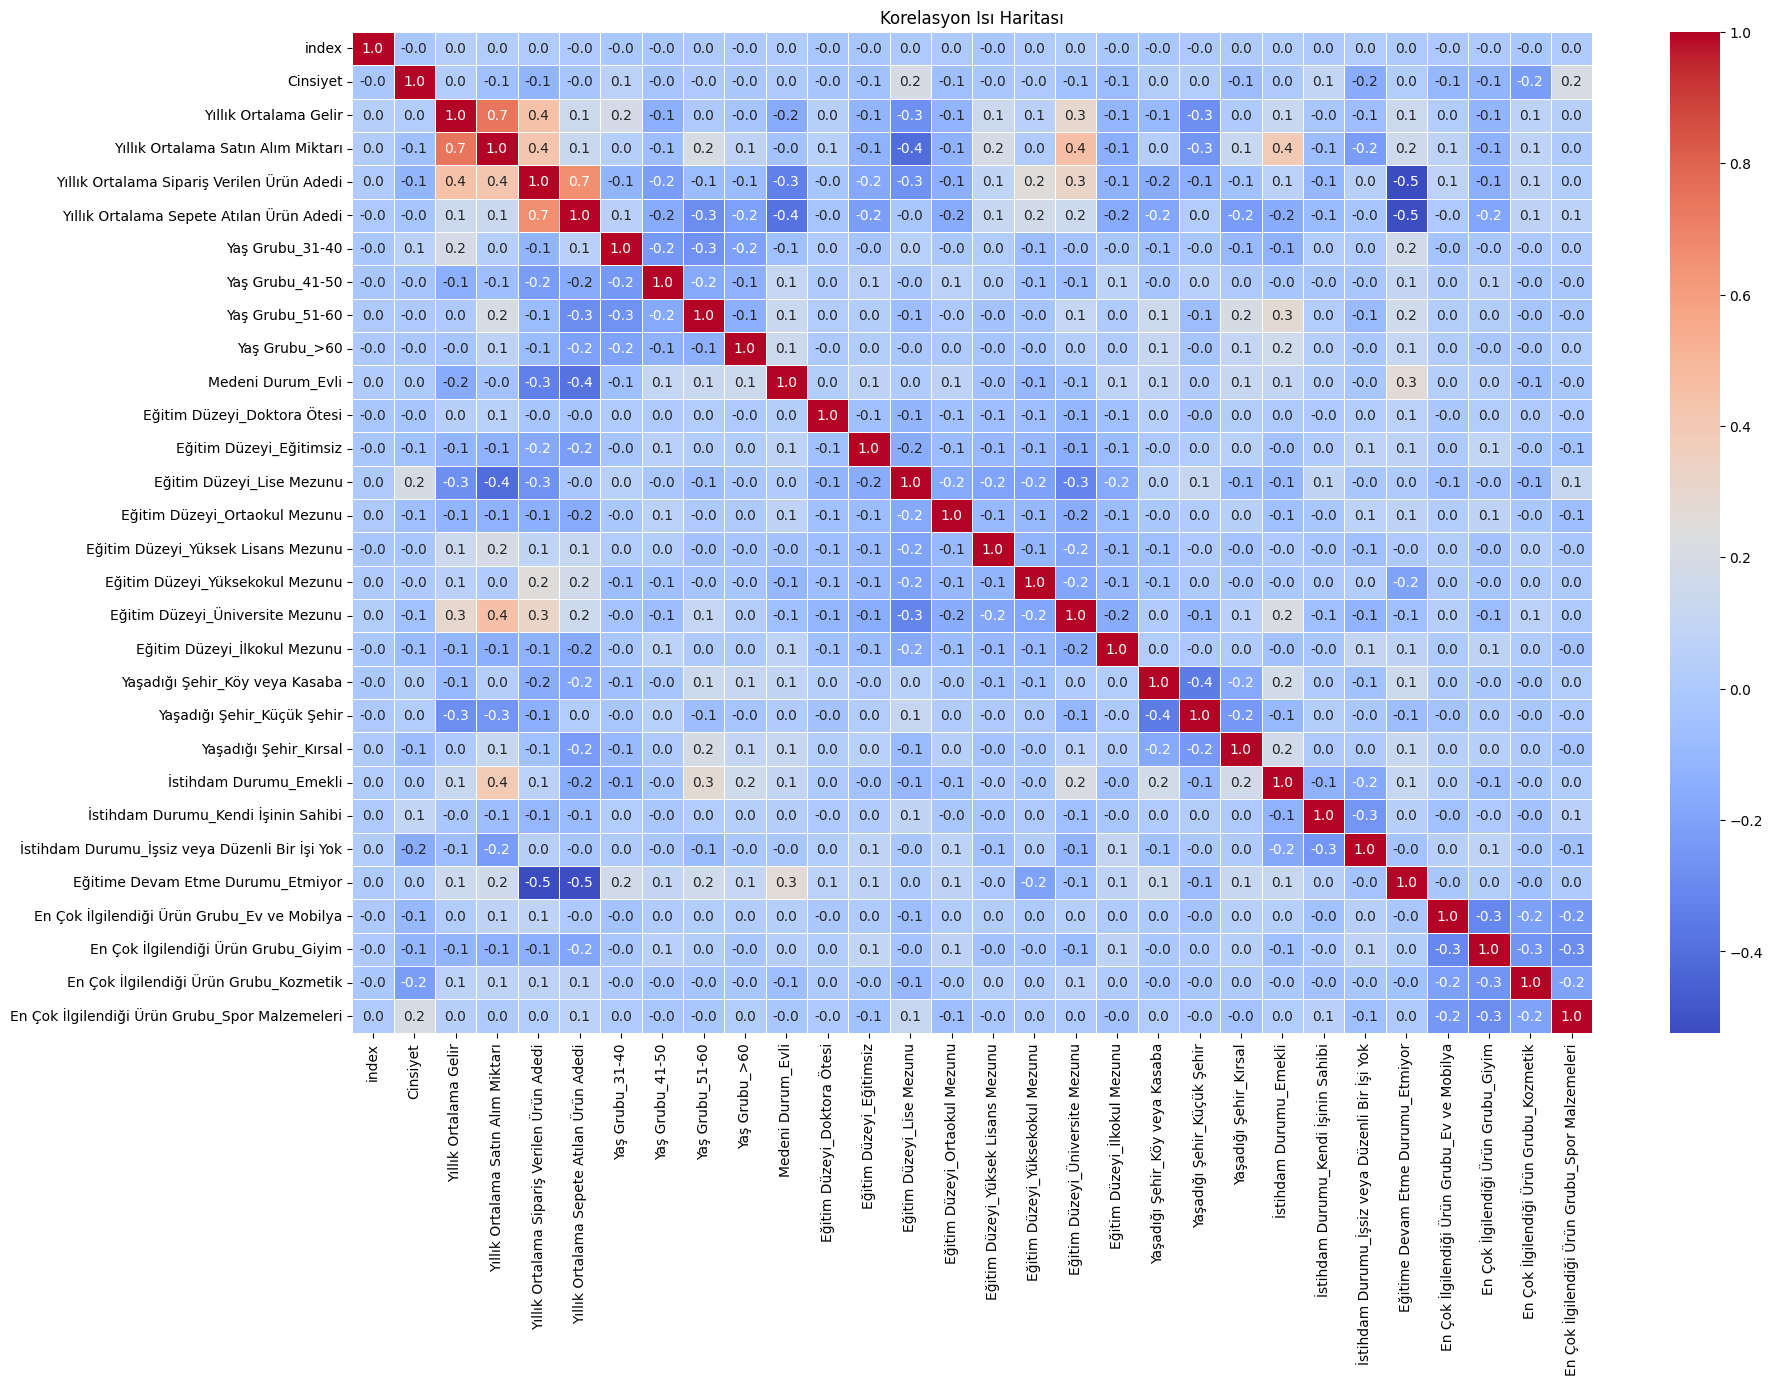

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Eğitim kümesinin ısı haritasına bakarak birbirleri ile ilişkileri konusunda daha detaylı fikir sahip olma

plt.figure(figsize=(20, 13))  
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5) 

plt.title('Korelasyon Isı Haritası')
plt.show()



In [15]:
#Deneme sonucunda eğitim için hazırlanan son dataframeler
X_train = egitim_verisi.drop(['Öbek İsmi'], axis=1)
y_train = egitim_verisi["Öbek İsmi"]
X_test = test_verisi

In [55]:
#x train y train kendi içinde test edilerek modellerin 
#accuracy sonucu hakkında eğtim verisi içinde bir sonuca ulaşıldı çünkü günlük 3 hak olduğundan

from sklearn.model_selection import train_test_split

eg_veri_tüm= egitim_verisi.drop(['Öbek İsmi'], axis=1)
eg_veri_hedef = egitim_verisi["Öbek İsmi"]
X_train, X_test, y_train, y_test = train_test_split(eg_veri_tüm, eg_veri_hedef, test_size=0.25, random_state=42)

# Sütunlar için kümeleme denendi 

silhouette score en yüksek olan "ıllık Ortalama Satın Alım Miktarı" Sütununu 2 grup şeklinde ayırıp veriler üzerinde daha doğru sonucu gelmesini beklendi ama sonuç beklenildiği gibi düştü bu yüzden sadece deneme olarak kaldı

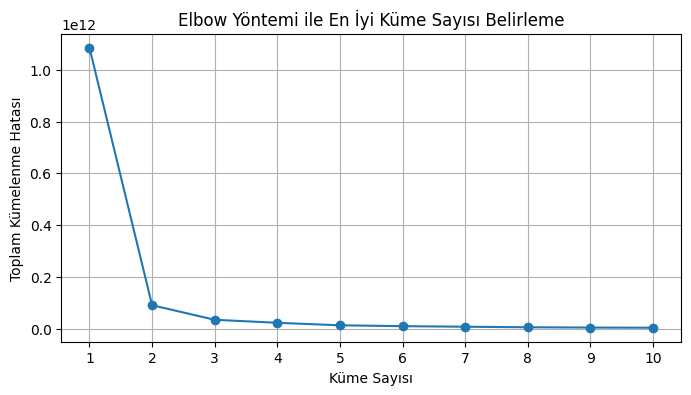

k = 2 için silhouette skoru: 0.8466922005346589
k = 3 için silhouette skoru: 0.7887136691523033
k = 4 için silhouette skoru: 0.7746053008377106
k = 5 için silhouette skoru: 0.6254219198737515
k = 6 için silhouette skoru: 0.6067173797298065
k = 7 için silhouette skoru: 0.6052151028100025
k = 8 için silhouette skoru: 0.6159298042317282
k = 9 için silhouette skoru: 0.6151222839963895
k = 10 için silhouette skoru: 0.6129726267819622
k = 11 için silhouette skoru: 0.6093374270890086
k = 12 için silhouette skoru: 0.5861323251595143
k = 13 için silhouette skoru: 0.5884684905940438
k = 14 için silhouette skoru: 0.5903465461585506
k = 15 için silhouette skoru: 0.5878729214140469
k = 16 için silhouette skoru: 0.5608435227199341
k = 17 için silhouette skoru: 0.5681632094489818
k = 18 için silhouette skoru: 0.5293188896708693
k = 19 için silhouette skoru: 0.5436470071610539


index  Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0         0         0     31-40        Bekar  Yüksek Lisans Mezunu   
1         1         1       >60         Evli           Lise Mezunu   
2         2         1     18-30        Bekar           Lise Mezunu   
3         3         1     51-60         Evli           Lise Mezunu   
4         4         1     31-40         Evli       Ortaokul Mezunu   
...     ...       ...       ...          ...                   ...   
5455   5455         0       >60        Bekar     Üniversite Mezunu   
5456   5456         1     51-60         Evli         Doktora Ötesi   
5457   5457         0     51-60         Evli        İlkokul Mezunu   
5458   5458         0     18-30        Bekar     Yüksekokul Mezunu   
5459   5459         1     18-30        Bekar     Yüksekokul Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0     Düzenli ve Ücretli Bir İşi Var          748266.440879      Büyük Şehir   
1                Kendi İşinin Sahibi          246298.609605      Küçük Şehir   
2     Düzenli ve Ücretli Bir İşi Var          268582.732360      Küçük Şehir   
3                Kendi İşinin Sahibi          327721.837865           Kırsal   
4     İşsiz veya Düzenli Bir İşi Yok          397431.626948      Büyük Şehir   
...                              ...                    ...              ...   
5455                          Emekli          478054.247819  Köy veya Kasaba   
5456             Kendi İşinin Sahibi          481852.853651  Köy veya Kasaba   
5457  Düzenli ve Ücretli Bir İşi Var          309443.687351      Küçük Şehir   
5458  Düzenli ve Ücretli Bir İşi Var          266604.268016      Büyük Şehir   
5459  Düzenli ve Ücretli Bir İşi Var          276155.078333      Büyük Şehir   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0     Elektronik ve Teknolojik Ürünler                        32010.900881   
1                     Spor Malzemeleri                         4145.729891   
2                                Giyim                         9924.379414   
3                                Giyim                         6417.780714   
4                                Giyim                         7886.663061   
...                                ...                                 ...   
5455                          Kozmetik                        43182.299801   
5456                     Ev ve Mobilya                        42107.996193   
5457                     Ev ve Mobilya                         4655.392445   
5458                     Ev ve Mobilya                         9016.165906   
5459                  Spor Malzemeleri                         9455.657480   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                      37.310644                   Etmiyor   
1                                      11.554851                   Etmiyor   
2                                      55.353236                    Ediyor   
3                                      15.417239                   Etmiyor   
4                                      14.689837                   Etmiyor   
...                                          ...                       ...   
5455                                   31.356284                   Etmiyor   
5456                                   26.288620                   Etmiyor   
5457                                    5.156906                   Etmiyor   
5458                                   39.205399                    Ediyor   
5459                                   50.554188                    Ediyor   

     Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0       obek_4                                102.936904  
1       obek_5                                 82.176053  
2       obek_8                                141.661426  
3       obek_3                                 17.097397  
4       obek_3                     

In [56]:
import pandas as pd
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore", category=Warning)
df = egitim_verisi

k_values = range(1, 11) 

sütun = 'Yıllık Ortalama Satın Alım Miktarı'

# Her küme sayısı için K-Means modelini eğitip toplam kümelenme hatasını kaydedildi
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[[sütun]])
    inertia_values.append(kmeans.inertia_)

# Elbow yöntemi ile en iyi küme sayısını belirlendi
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Yöntemi ile En İyi Küme Sayısı Belirleme')
plt.xlabel('Küme Sayısı')
plt.ylabel('Toplam Kümelenme Hatası')
plt.xticks(k_values)
plt.grid(True)
plt.show()
from sklearn.metrics import silhouette_score

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[[sütun]])
    score = silhouette_score(df[[sütun]], kmeans.labels_)
    print(f"k = {k} için silhouette skoru: {score}")

df

In [57]:
#clustering ile gerekli sütunlar sınıflandırılıp yerine yerleştirildi
import numpy as np
import warnings


warnings.filterwarnings("ignore", category=Warning)

df = X_train

istenilen_sütun = 'Yıllık Ortalama Satın Alım Miktarı'

df[istenilen_sütun] = df[istenilen_sütun].astype('float')

# K sayısını 2 olarak belirledi
kmeans = KMeans(n_clusters=2)

kmeans.fit(df[[istenilen_sütun]])

# Küme merkezlerini ve etiketlerini alındı.
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

df[istenilen_sütun] = labels
X_train = df
df

index  Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
5382   5382         1     18-30         Evli     Üniversite Mezunu   
594     594         0     18-30         Evli     Yüksekokul Mezunu   
2829   2829         1     31-40        Bekar           Lise Mezunu   
450     450         0     18-30         Evli        Doktora Mezunu   
2259   2259         0     41-50        Bekar     Yüksekokul Mezunu   
...     ...       ...       ...          ...                   ...   
3772   3772         0     18-30        Bekar             Eğitimsiz   
5191   5191         1     18-30         Evli     Üniversite Mezunu   
5226   5226         1     41-50         Evli  Yüksek Lisans Mezunu   
5390   5390         1       >60        Bekar        İlkokul Mezunu   
860     860         0     18-30         Evli         Doktora Ötesi   

                     İstihdam Durumu  Yıllık Ortalama Gelir Yaşadığı Şehir  \
5382  Düzenli ve Ücretli Bir İşi Var          270752.562584    Küçük Şehir   
594   İşsiz veya Düzenli Bir İşi Yok          228860.873147    Büyük Şehir   
2829             Kendi İşinin Sahibi          227855.861547    Büyük Şehir   
450   Düzenli ve Ücretli Bir İşi Var          317423.882422    Büyük Şehir   
2259  İşsiz veya Düzenli Bir İşi Yok          151033.364778         Kırsal   
...                              ...                    ...            ...   
3772  İşsiz veya Düzenli Bir İşi Yok          178679.579655    Küçük Şehir   
5191  Düzenli ve Ücretli Bir İşi Var          277354.294419    Büyük Şehir   
5226  Düzenli ve Ücretli Bir İşi Var          356640.930748    Küçük Şehir   
5390             Kendi İşinin Sahibi          276976.542382    Küçük Şehir   
860   İşsiz veya Düzenli Bir İşi Yok          323575.691398    Küçük Şehir   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
5382  Elektronik ve Teknolojik Ürünler                                   1   
594                      Ev ve Mobilya                                   1   
2829                  Spor Malzemeleri                                   1   
450                              Giyim                                   0   
2259                     Ev ve Mobilya                                   1   
...                                ...                                 ...   
3772                          Kozmetik                                   1   
5191                     Ev ve Mobilya                                   1   
5226                     Ev ve Mobilya                                   0   
5390  Elektronik ve Teknolojik Ürünler                                   1   
860                           Kozmetik                                   1   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
5382                                   53.134262                    Ediyor   
594                                    54.067066                    Ediyor   
2829                                   11.198655                   Etmiyor   
450                                    19.484469                    Ediyor   
2259                                   20.103985                   Etmiyor   
...                                          ...                       ...   
3772                                   10.187315                   Etmiyor   
5191                                   53.567748                    Ediyor   
5226                                   16.750845                    Ediyor   
5390                                   13.800048                   Etmiyor   
860                                     5.892126                   Etmiyor   

      Yıllık Ortalama Sepete Atılan Ürün Adedi  
5382                                172.619359  
594                                 155.135878  
2829                                 94.602064  
450                                  78.999072  
2259                                 50.620565  
...                                        ...  
3772       

# Model Train Kısmı

Üst kısımda DataPreprocessing  aşamassı yapıldı bu kısımdada farklı modeller eğitilerek accuracy sonucuna bakıldı

Diğer modeller için de hiperparametre optimizasyonunu bu şekilde yaptığım için ayrıca kod olarak eklemedim.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Grid Search için denenecek hiperparametre optimizasyonu
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi doğruluk (accuracy):", grid_search.best_score_)

# En iyi modeli aldım
best_rf_model = grid_search.best_estimator_

# Test verisi üzerinde tahmin yapma
tahmin_sonuclari = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, tahmin_sonuclari)
print("Test Doğruluk (Accuracy):", accuracy)


In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Random Forests sınıflandırıcı modelini oluşturuldu
model = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42  
)
# Modeli eğitin
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapın
tahmin_sonuclari = model.predict(X_test)

# Model performansını değerlendirildi bunu Train verisi içinde ayrıca sonuçlar denenmesi için eklenmiştir.

#accuracy = accuracy_score(y_test, tahmin_sonuclari)

#print("Doğruluk (Accuracy):", accuracy)

In [ ]:
#XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np


# Hedef değişkeni sayılara dönüştürme
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

model = XGBClassifier(
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    n_estimators=100,
    subsample=0.9,
    random_state=42  
)

# Modeli eğitim
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
tahmin_sonuclari = model.predict(X_test)

# Kategorileri tanımlama
categories = {
    0: "obek_1",
    1: "obek_2",
    2: "obek_3",
    3: "obek_4",
    4: "obek_5",
    5: "obek_6",
    6: "obek_7",
    7: "obek_8",
}

tahmin_sonuclari = np.vectorize(categories.get)(tahmin_sonuclari)

accuracy = accuracy_score(y_test, tahmin_sonuclari)
classification_rep = classification_report(y_test, tahmin_sonuclari)

print("Doğruluk (Accuracy):", accuracy)
print("Sınıflandırma Raporu:\n", classification_rep)

In [ ]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Hedef değişkeni sayılara dönüştürme
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# AdaBoost sınıflandırıcı modelini oluşturma

model = XGBClassifier(
    learning_rate=0.97,
    n_estimators=50,
)

# Modeli eğitme
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
tahmin_sonuclari = model.predict(X_test)

# Kategorileri tanımlama
categories = {
    0: "obek_1",
    1: "obek_2",
    2: "obek_3",
    3: "obek_4",
    4: "obek_5",
    5: "obek_6",
    6: "obek_7",
    7: "obek_8",
}

tahmin_sonuclari = np.vectorize(categories.get)(tahmin_sonuclari)

accuracy = accuracy_score(y_test, tahmin_sonuclari)
classification_rep = classification_report(y_test, tahmin_sonuclari)

print("Doğruluk (Accuracy):", accuracy)
print("Sınıflandırma Raporu:\n", classification_rep)

In [ ]:
#SVM HİPERPARAMETRE TESPİT
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Eğitim ve test verilerinizi ayrı ayrı yükleme (örnek veri yani train datası içindeki train üstte de belirttiklerim gibi)
X_train = egitim_verisi.drop(['Öbek İsmi'], axis=1)
y_train = egitim_verisi['Öbek İsmi']
X_test = test_verisi

# Verileri normalize etme
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Hedef değişkeni kodlama
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# SVM sınıflandırıcı modelini oluşturma
svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  
}

# GridSearchCV ile en iyi hiperparametre kombinasyonunu bulma
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_normalized, y_train_encoded)

# En iyi modeli alma
en_iyi_model = grid_search.best_estimator_

# En iyi parametreleri ve performansı görüntüleme
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi cross-validation skoru:", grid_search.best_score_)

tahmin_sonuclari = en_iyi_model.predict(X_test_normalized)

test_accuracy = accuracy_score(y_test_encoded, tahmin_sonuclari)
print("Test verisi doğruluk skoru:", test_accuracy)

# Son olarak verileri kaydetme

In [ ]:
veri = {
    'id': range(2340),
    'Öbek İsmi': tahmin_sonuclari
}
Tahmin_Dataframe = pandas.DataFrame(veri)
Tahmin_Dataframe.set_index('id', inplace=True)
Tahmin_Dataframe

In [ ]:
Tahmin_Dataframe.to_csv('submission.csv')

# Kaydedilen dataframeleri kıyaslama

In [ ]:
 # İki veri setini kıyasla
print("**Karşılaştırma**")

print(df20.compare(df8))